In [1]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [2]:
data_lodge1=pd.read_csv('E:/kim_jiwon/src/Project_02/data/월평균가계지출세부/가구당_월평균_가계지출__전국_1인이상__20210415175626_음식숙박1.csv',sep=',',encoding='cp949')
data_lodge2=pd.read_csv('E:/kim_jiwon/src/Project_02/data/월평균가계지출세부/가구당_월평균_가계지출__전국_1인이상__20210415175626_음식숙박2.csv',sep=',',encoding='cp949')

In [3]:
data_lodge1


#data.rename(index = {'가계지출항목별(1)':'년도'}, inplace = True)
#data_lodge1 정제
data_lodge1["가계지출항목별(2)"]=data_lodge1["가계지출항목별(2)"].apply(lambda x:str(x.split(" ")[0]))
data_lodge1=data_lodge1.set_index(data_lodge1.loc[:,"가계지출항목별(2)"])
data_lodge1=data_lodge1.loc[:,"2017":"2018"]
data_lodge1=data_lodge1.loc["소계":,"2017":"2018"]
data_lodge1


,2017,2018
가계지출항목별(2),,
소계,354158,349699
식사비,341002,336133
숙박비,13156,13566


In [4]:
data_lodge2=data_lodge2.set_index(data_lodge2.loc[:,"가계수지항목별"],drop=True)
data_lodge2=data_lodge2.loc[:,"2019":"2020"]
data_lodge2.rename(index = {"11.음식 · 숙박":"소계"}, inplace = True)
data_lodge2=data_lodge2.loc["소계":,"2019":"2020"]
data_lodge2

,2019,2020
가계수지항목별,,
소계,345710,319220
식사비,333552,308992
숙박비,12158,10229


In [5]:
lodge_cases=pd.concat([data_lodge1,data_lodge2],axis=1)
lodge_cases

,2017,2018,2019,2020
소계,354158,349699,345710,319220
식사비,341002,336133,333552,308992
숙박비,13156,13566,12158,10229


In [6]:
lodge_cases=lodge_cases.reset_index()
lodge_cases.rename(columns={'index':"항목"},inplace=True)
lodge_cases

,항목,2017,2018,2019,2020
0,소계,354158,349699,345710,319220
1,식사비,341002,336133,333552,308992
2,숙박비,13156,13566,12158,10229


In [7]:
lodge_cases_melt=lodge_cases.melt(id_vars=["항목"],var_name="년도",value_name="가계지수")
lodge_cases_melt

,항목,년도,가계지수
0,소계,2017,354158
1,식사비,2017,341002
2,숙박비,2017,13156
3,소계,2018,349699
4,식사비,2018,336133
5,숙박비,2018,13566
6,소계,2019,345710
7,식사비,2019,333552
8,숙박비,2019,12158
9,소계,2020,319220


In [8]:
lodge_cases_melt[['가계지수']] = lodge_cases_melt[['가계지수']].astype(int)
lodge_cases_melt.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목      12 non-null     object
 1   년도      12 non-null     object
 2   가계지수    12 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 368.0+ bytes


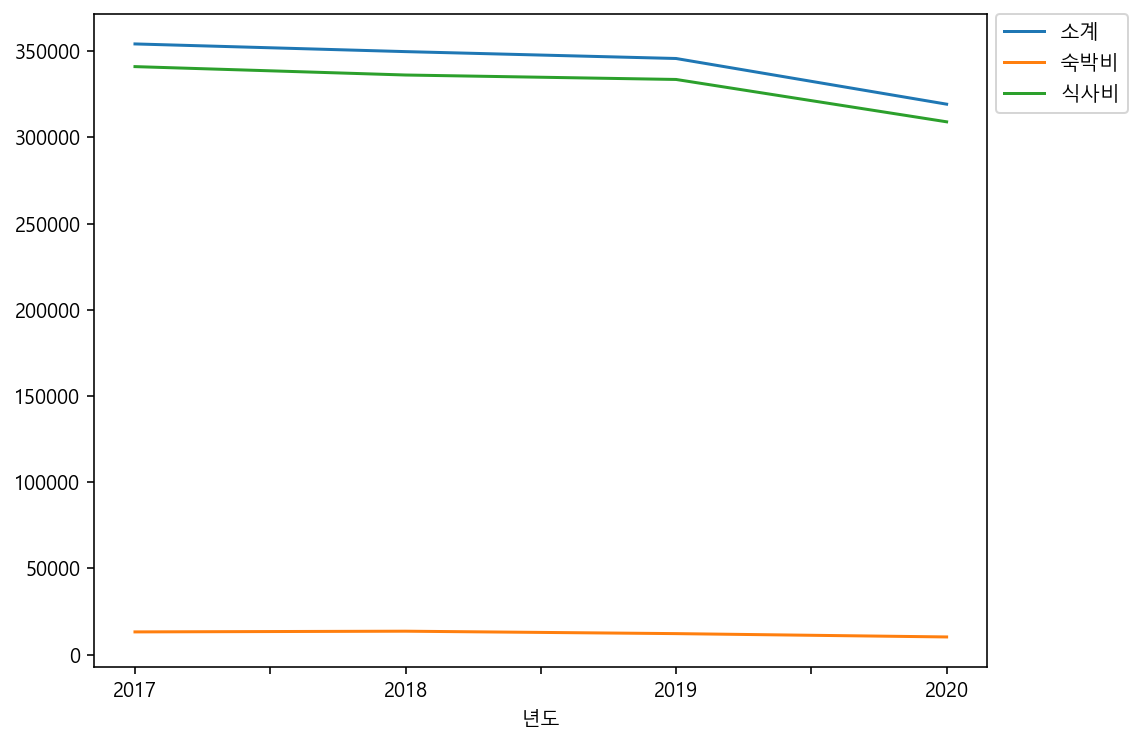

In [9]:
lodge_cases_melt.pivot_table(index='년도',columns='항목',values='가계지수').plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/graph/가구당 월평균 가계지수 변화_식사숙박.png')

In [10]:

lodge_cases_piv=lodge_cases.T
lodge_cases_piv.columns=lodge_cases_piv.iloc[0,:]
lodge_cases_piv=lodge_cases_piv.iloc[1:,:]
lodge_cases_piv=lodge_cases_piv.astype(int)
lodge_cases_piv=lodge_cases_piv.reset_index()
lodge_cases_piv=lodge_cases_piv.rename(columns= {'index':'년도'})
lodge_cases_piv

항목,년도,소계,식사비,숙박비
0,2017,354158,341002,13156
1,2018,349699,336133,13566
2,2019,345710,333552,12158
3,2020,319220,308992,10229


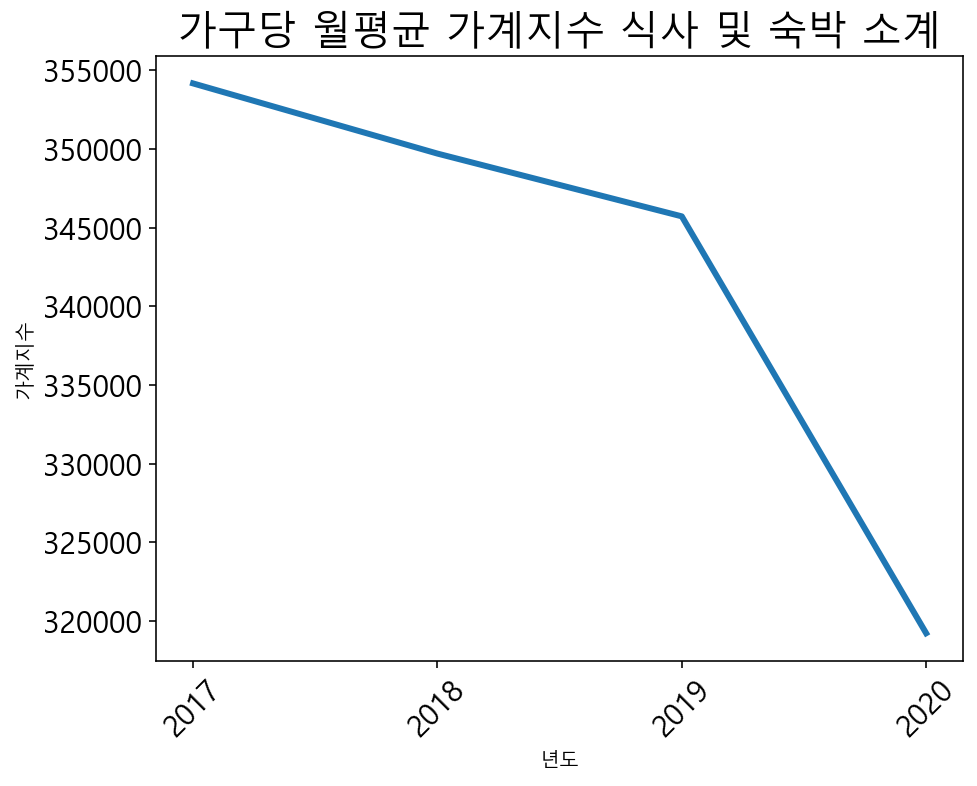

In [11]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("년도", "소계",data=lodge_cases_piv,linewidth=3 )
#plt.plot("년도", "여 소계",data=lodge_cases,linewidth=3, color='Blue')
#plt.plot("년도", "남 소계",data=lodge_cases,linewidth=3, color='red')
ax.set_title('가구당 월평균 가계지수 식사 및 숙박 소계', fontsize=20)
ax.set_xlabel('년도')
ax.set_ylabel('가계지수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
#plt.ylim([100000,580000])
plt.savefig('E:/kim_jiwon/src/project_02/graph/가구당 월평균 가계지수 변화_식사 및 숙박 소계.png')

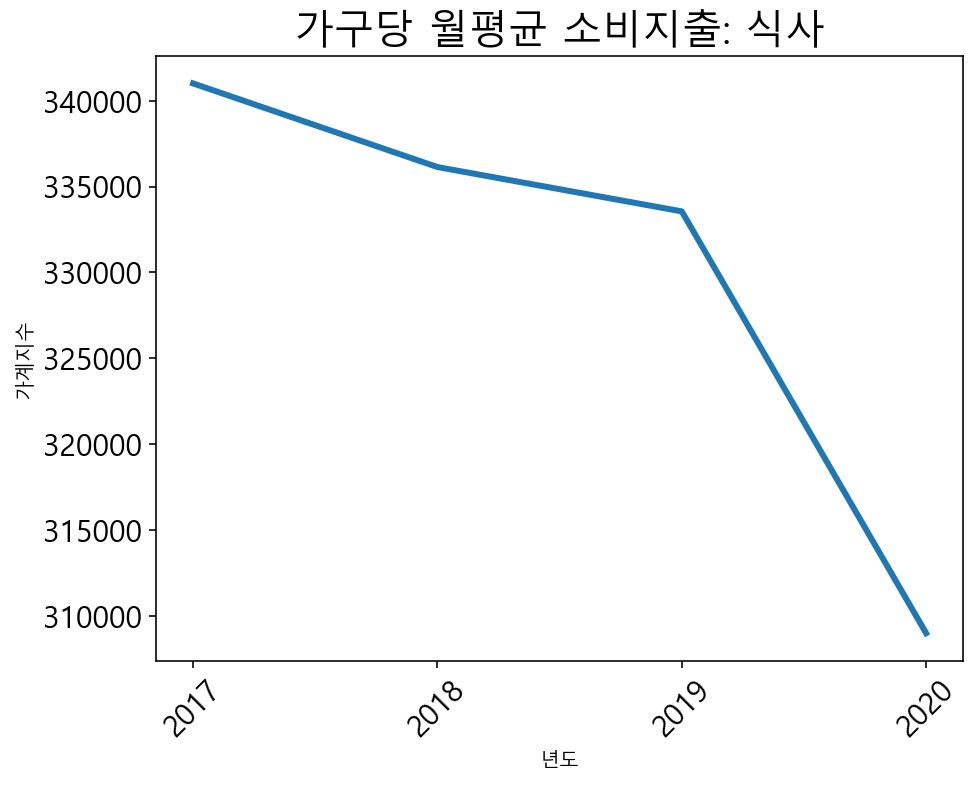

In [12]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("년도", "식사비",data=lodge_cases_piv,linewidth=3)
#plt.plot("년도", "여 소계",data=lodge_cases,linewidth=3, color='Blue')
#plt.plot("년도", "남 소계",data=lodge_cases,linewidth=3, color='red')
ax.set_title('가구당 월평균 소비지출: 식사', fontsize=20)
ax.set_xlabel('년도')
ax.set_ylabel('가계지수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
#plt.ylim([100000,580000])
plt.savefig('E:/kim_jiwon/src/project_02/graph/가구당 월평균 소비지출 변화_식사.png')

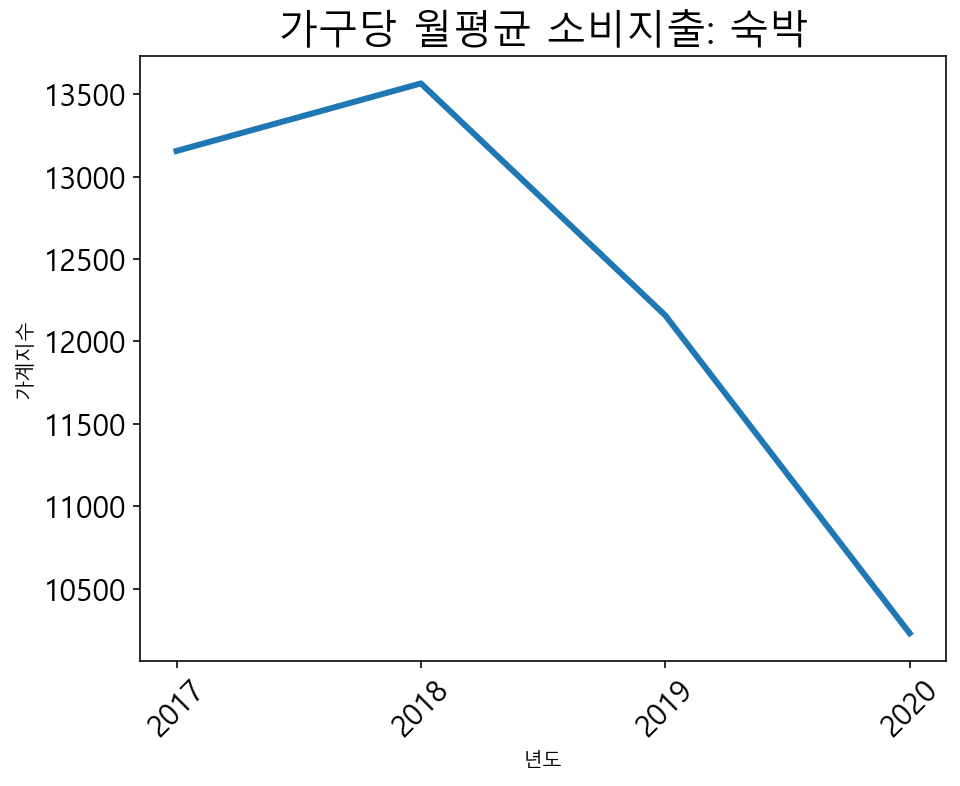

In [13]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("년도", "숙박비",data=lodge_cases_piv,linewidth=3)
#plt.plot("년도", "여 소계",data=lodge_cases,linewidth=3, color='Blue')
#plt.plot("년도", "남 소계",data=lodge_cases,linewidth=3, color='red')
ax.set_title('가구당 월평균 소비지출: 숙박', fontsize=20)
ax.set_xlabel('년도')
ax.set_ylabel('가계지수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
#plt.ylim([100000,580000])
plt.savefig('E:/kim_jiwon/src/project_02/graph/가구당 월평균 소비지출 변화_숙박.png')